In [2]:
import nltk
from kafka import KafkaConsumer
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
dfo = 0

In [5]:
nltk.download("wordnet")


def topic_identification(tweets, N, group_number):
    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer(stop_words="english")

    # Fit the vectorizer to the tweets in the group
    vectorizer.fit(tweets)

    # Transform the tweets in the group into a TF-IDF matrix
    tfidf_matrix = vectorizer.transform(tweets)

    # Get the feature names (the vocabulary)
    feature_names = vectorizer.get_feature_names_out()

    # Get the top N features with the highest mean TF-IDF score
    mean_scores = tfidf_matrix.mean(axis=0)
    top_features = [
        (feature_names[i], mean_scores[0, i]) for i in mean_scores.nonzero()[1].tolist()
    ]
    top_features.sort(key=lambda x: x[1], reverse=True)
    top_features = top_features[:N]

    # Print the top features for the group
    df = pd.DataFrame(top_features)
    dfo = df
    plot = df.plot(kind="barh", colormap="binary")

    fig = plot.get_figure()
    fig.savefig(
        "./python/tmp/class" + str(group_number) + ".svg", format="svg", dpi=1200
    )

    return dfo

# This function compute the TF-IDF of each class after receiving the batch data in order to infer the topics
def topics_processing(N_classes, N):

    print("Starting Topics identification/ classification")
    print("number of groups =", N_classes)
    no_groups = N_classes

    # Kafka consumer setup
    # consumer_topics = KafkaConsumer(bootstrap_servers=['localhost:9092'], auto_offset_reset='earliest') #,group_id=None
    # do this if its not a 'running topic'
    consumer_topics = KafkaConsumer()

    consumer_topics.subscribe(["class" + str(i) for i in range(N_classes)])
    list_of_groups = {}
    for i in range(no_groups):
        list_of_groups["list_" + str(i)] = []
    msg_no = 0

    for message in consumer_topics:
        msg_no += 1
        tweet = json.loads(message.value.decode("utf-8"))
        group = int(message.topic[-1])
        tweet_clean = tweet_preprocessing(tweet)
        list_of_groups["list_" + str(group)].append(tweet_clean)
        if msg_no == 10:
            break

    for i, list in enumerate(list_of_groups):  # attention
        tweets = list_of_groups[list]
        if len(tweets) != 0:
            return topic_identification(tweets, N, i)



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zakariatozy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
dfo = topics_processing(N_classes=5, N=10)  # N_classes or N_clusters

Starting Topics identification/ classification
number of groups = 5


NameError: name 'tweet_preprocessing' is not defined

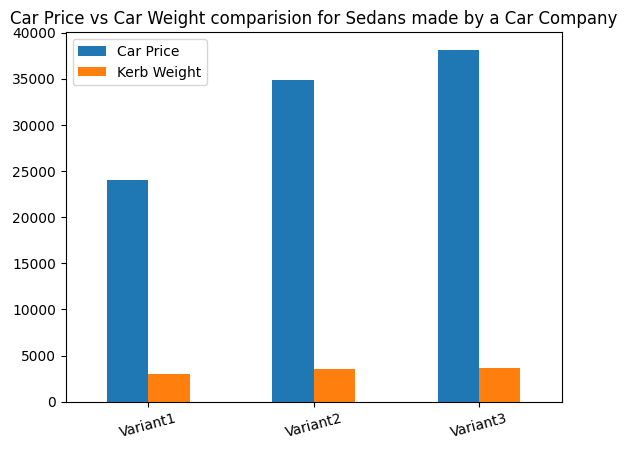

In [7]:

# Example Python program to plot a complex bar chart 

import pandas as pd

import matplotlib.pyplot as plot

 

# A python dictionary

data = {"Car Price":[24050, 34850, 38150],

        "Kerb Weight":[3045, 3572, 3638]

        };

index     = ["Variant1", "Variant2", "Variant3"];

 

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a vertical bar chart

dataFrame.plot.bar(rot=150, title="Car Price vs Car Weight comparision for Sedans made by a Car Company");

plot.show(block=True);